In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#from sklearn.impute import KNNImputer
#from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
#from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier ,StackingClassifier ,GradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD
#import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split , RandomizedSearchCV ,GridSearchCV
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectKBest, f_classif
#from prettytable import PrettyTable

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
def remove_funtion(data):
    for i in data.columns:
        if i.split()[0] == 'Unnamed:':
            data = data.drop(i,axis = 1)
    return data

def train_test_pred(clf,x_train , x_val):
    p_train = clf.predict_proba(x_train)
    print('AUC Score of Train Data : ',roc_auc_score(y_train , p_train[:,1]))

    p_test = clf.predict_proba(x_val)
    print('AUC Score of Val_data   : ',roc_auc_score(y_val, p_test[:,1]))

def test_pred(clf,test_data , file_name):

    submission = pd.DataFrame(columns = ['id','target'])

    submission['id'] = ids

    #test_data = test_data.drop('id',axis = 1)

    pred = clf.predict_proba(test_data)

    submission['target'] = pred[:,1]

    submission.to_csv('/content/{}.csv'.format(file_name),index=False)

    return 'Prediction on Test Data is saved.'

def feature_impotance_plot(clf , title):
    feature_impo = clf.feature_importances_.argsort()
    features = x_train.columns[feature_impo]
    rf = pd.DataFrame({'features' : features , 'importance' : clf.feature_importances_  })
    rf = rf.sort_values('importance' , ascending=False)
    rf.head(3)

    plt.figure(figsize= (20,7))
    plt.bar( rf['features'] , rf['importance'])
    plt.ylabel('Importance')
    plt.title('Feature Importance of {}'.format(title))
    plt.xticks(rotation=90)
    plt.xlabel('Name of Features')
    plt.show()
    

In [28]:
os.chdir('/content/drive/MyDrive/Case_study_1/original_csv_files/csv_files')
files = os.listdir()

# **Label encoding**

In [30]:
train_data = pd.read_csv('train_data_final.csv')
train_data  = remove_funtion(train_data)

val_data  = pd.read_csv('val_data_final.csv')
val_data  = remove_funtion(val_data)

test_data = pd.read_csv('test_data_final.csv')
test_data = remove_funtion(test_data)

In [ ]:
x_train = train_data.samaple(187500)
x_val   = val_data.sample(62500)

y_train = x_train['target']
x_train = x_train.drop('target',axis = 1 )

y_val  = x_val_['target']
x_val = x_val.drop('target' , axis = 1 )

In [22]:
#drop_list = [ 'country_code ' , 'composer_count' , 'one_genre','expire_month','city' ,'regi_day','age_gap_between_song' ,'isrc']

#x_train = x_train.drop(drop_list,axis = 1)
#x_val   = x_val.drop(drop_list,axis = 1)
#test_data  = test_data.drop(drop_list,axis = 1)

print('Train Shape :',x_train.shape , y_train.shape)
print('Vali  Shape :',x_val.shape , y_val.shape)
print('Test  shape :',test_data.shape)

Train Shape : (187500, 32) (187500, 1)
Vali  Shape : (62500, 32) (62500, 1)
Test  shape : (2556790, 32)


In [ ]:
#x_train.to_csv('x_train.csv')
#y_train.to_csv('y_train.csv')
#print('train data saved.')

#x_val.to_csv('x_val.csv')
#y_val.to_csv('y_val.csv')
#print('val data saved.')

#test_data.to_csv('test_data.csv')
#y_test.to_csv('y_t.csv')
#print('test data saved.') 

test_data saved.


# **load csv files**

In [20]:
x_train = pd.read_csv('x_train.csv')
x_train = remove_funtion(x_train)
y_train = pd.read_csv('y_train.csv')
y_train = remove_funtion(y_train)

val_data = pd.read_csv('x_val.csv')
x_val = remove_funtion(val_data)
y_val    = pd.read_csv('y_val.csv')
y_val    = remove_funtion(y_val)

test_data = pd.read_csv('test_data.csv')
test_data = remove_funtion(test_data)
ids = test_data['id']
test_data = test_data.drop('id',axis = 1)

In [6]:
print('Train Shape :',x_train.shape , y_train.shape)
print('Vali  Shape :',x_val.shape , y_val.shape)
print('Test  shape :',test_data.shape)

Train Shape : (187500, 32) (187500, 1)
Vali  Shape : (62500, 32) (62500, 1)
Test  shape : (2556790, 32)


In [ ]:
x_train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'bd', 'registered_via', 'regi_month', 'regi_year',
       'expire_day', 'expire_year', 'imputed_bd', 'song_length', 'artist_name',
       'composer', 'lyricist', 'language', 'name', 'two_genre',
       'binary_song_length', 'like_language', 'lyricist_count',
       'composer_first_name', 'first_artist_name', 'regi_code', 'year',
       'designation_code', 'member_song_count', 'artist_song_count',
       'lang_song_count', 'song_member_count', 'age_song_count'],
      dtype='object')

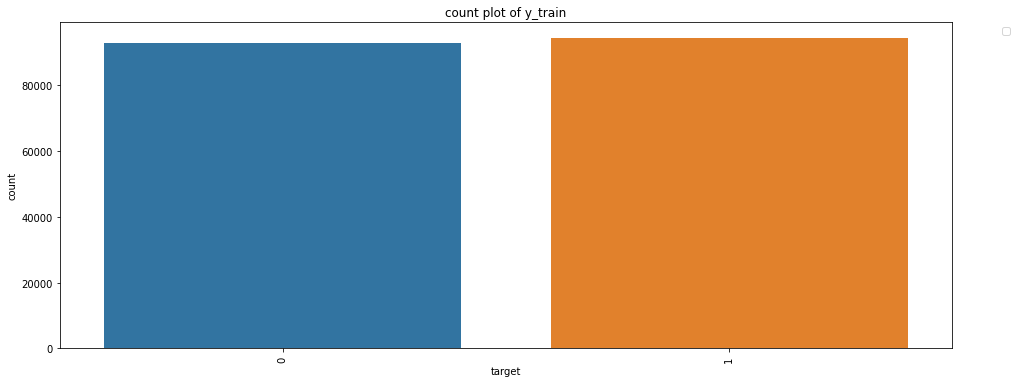

In [ ]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x= 'target' , data = y_train)
h,l = ax.get_legend_handles_labels()
ax.legend(h ,l,bbox_to_anchor=(1.05, 1) ,loc = 'upper left')
plt.setp(ax.get_xticklabels() , rotation = 90 )
plt.title('count plot of {}'.format('y_train'))
plt.show()

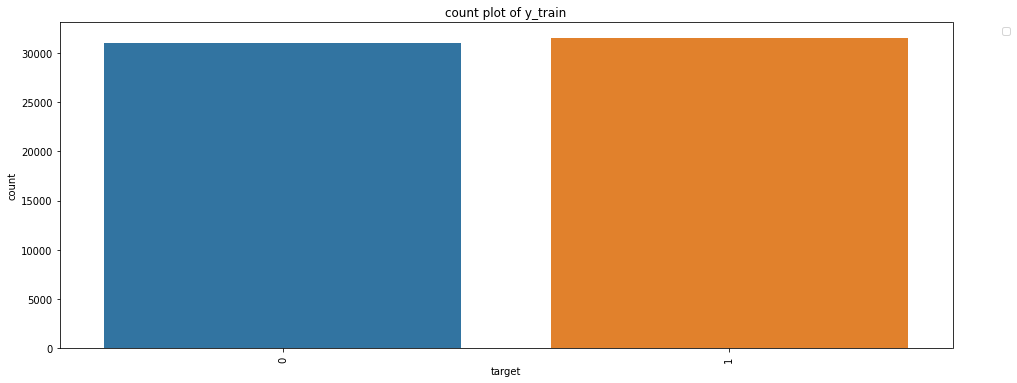

In [ ]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x= 'target' , data = y_val)
h,l = ax.get_legend_handles_labels()
ax.legend(h ,l,bbox_to_anchor=(1.05, 1) ,loc = 'upper left')
plt.setp(ax.get_xticklabels() , rotation = 90 )
plt.title('count plot of {}'.format('y_train'))
plt.show()

# **Decision Tree**

In [ ]:
start = time.time()
params = {
            'max_depth' : [ 3,5,8,10] , 
            'min_samples_split' : [ 50,100,200,300],
            'max_leaf_nodes' : list(range(2, 100 ,10))
}
clf = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=3 , cv = 5)
model.fit(x_train , y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_test , y_test))

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 15.2min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=92,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Train AUC  : 0.7023987302887769
Val AUC    : 0.7007307009766528


In [ ]:
clf = DecisionTreeClassifier(  ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=92,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'  )

In [ ]:
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.7016920747625112
AUC Score of Val_data   :  0.6969647662261466


In [ ]:
test_pred(clf,test_data,'decision_tree')

'Prediction on Test Data is saved.'

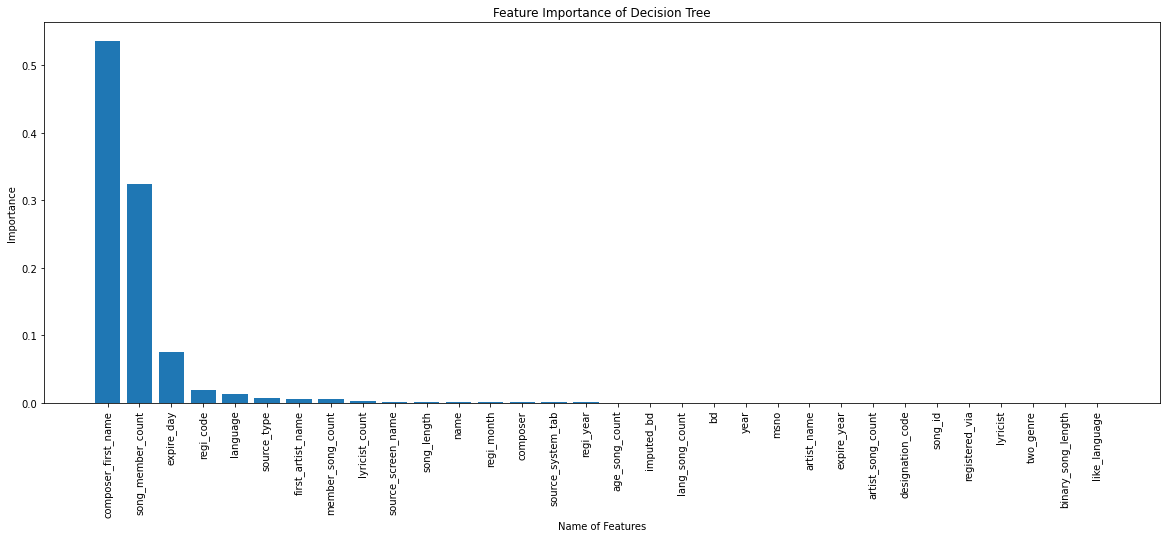

In [ ]:
feature_impotance_plot(clf , 'Decision Tree')

# **Random Forest**

In [ ]:
params = {
    'max_depth' : [ 3,5,8,10,13,15] , 
    'min_samples_split' : [ 3,50,100,200]}

clf = RandomForestClassifier(class_weight = 'balanced' , random_state=42)

model = RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 3)
model.fit(x_train, y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_val, y_val))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Train AUC  : 0.7693277528416759
Val AUC    : 0.7099977955828711


In [ ]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.7699170698922178
AUC Score of Val_data   :  0.7104669463334583


In [ ]:
test_pred(clf,test_data,'random_forest.csv')

'Prediction on Test Data is saved.'

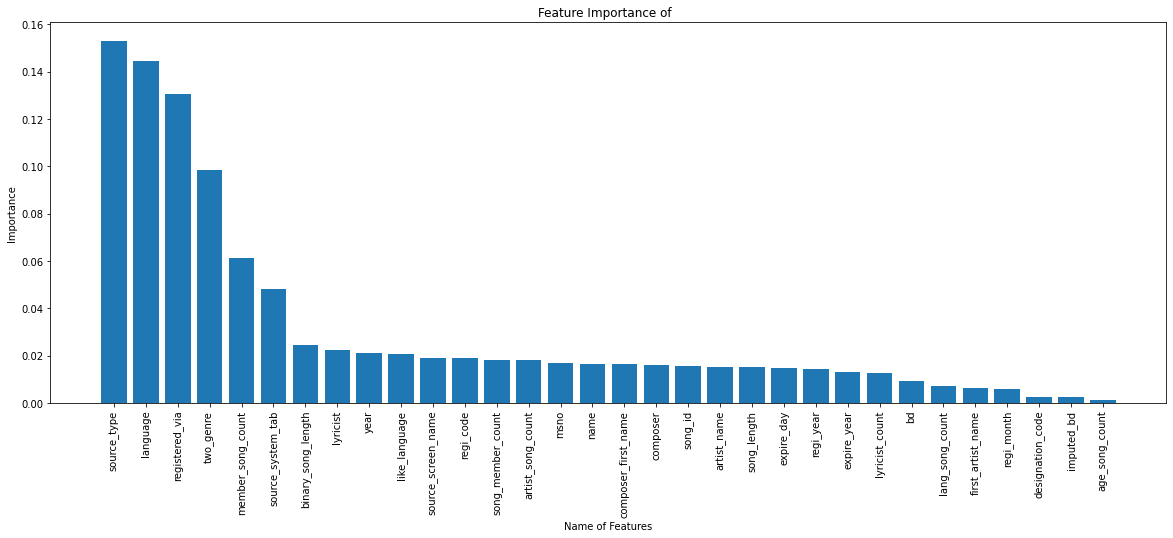

In [ ]:
feature_impotance_plot(clf , ' ')

# **AdaBoost**

In [ ]:
params = {
 'learning_rate' : [0.01,0.1,0.5,1]
 }

clf = AdaBoostClassifier()

model =  RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 3)
model.fit(x_train, y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_val , y_val))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)
Train AUC  : 0.6976825283616293
Val AUC    : 0.6977957629020033


In [ ]:
clf = AdaBoostClassifier( algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None )

clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.7004287436393046
AUC Score of Val_data   :  0.6996773761527502


In [ ]:
test_pred(clf,test_data , 'Adaboost')

'Prediction on Test Data is saved.'

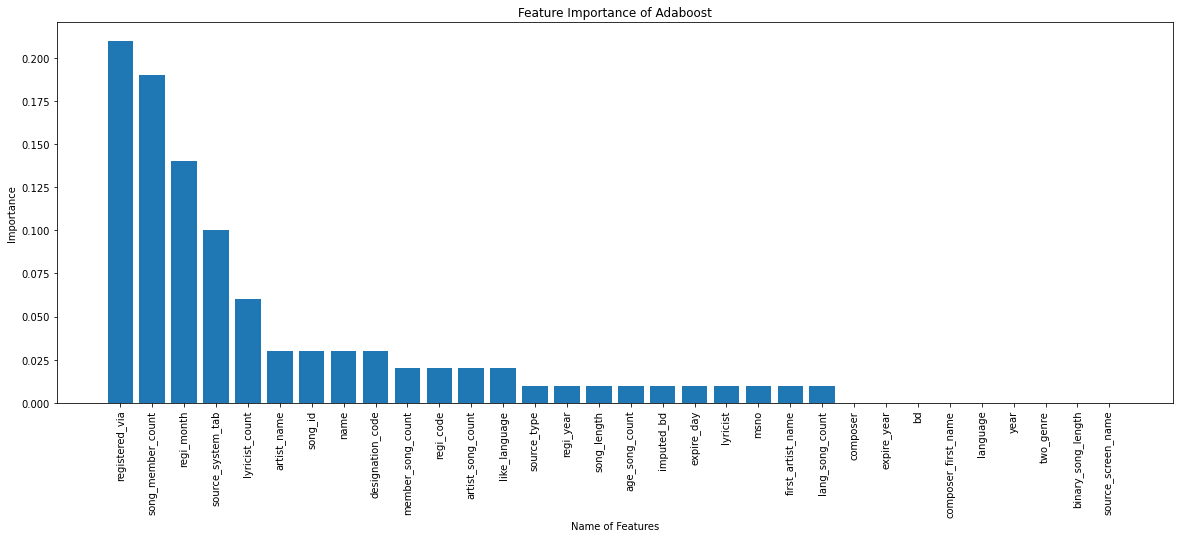

In [ ]:
feature_impotance_plot(clf , 'Adaboost')

# **XGBoost**

In [ ]:

params = {
 'learning_rate':[0.01,0.05,0.1,0.3],
 'max_depth':[3,5,10,13,15,18],
 'colsample_bytree':[0.1,0.3,0.5,1],
 'subsample':[0.1,0.3,0.5,1],
 'gamma':[0.01,0.1,0.2,0.4]
}

clf = XGBClassifier()

model =  RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 5)
model.fit(x_train, y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_test , y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 65.0min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Train AUC  : 0.9477400345335281
Val AUC    : 0.7256969739861358


In [ ]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(x_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.999983697417515
AUC Score of Val_data   :  0.7198900745664337


In [ ]:
test_pred(clf,test_data , 'XGBoost')

'Prediction on Test Data is saved.'

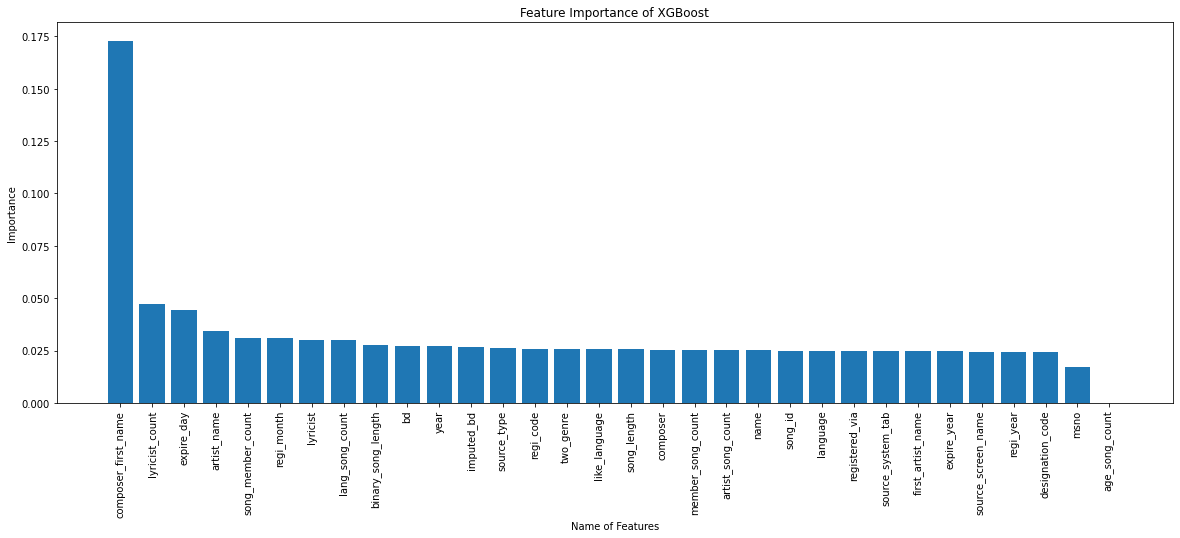

In [ ]:
feature_impotance_plot(clf , 'XGBoost')

# **LGBM**

In [ ]:
params = {'min_child_samples' : [5,8,10,15],
 'num_leaves' : [12,15,18,20],
 'max_depth' : [2,4,6,8,10],
 'n_estimators' : [100,200,300,500],
 'learning_rate' : [0.001,0.01,0.1,0.5]
 }

clf = LGBMClassifier()

model =  RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 3)
model.fit(x_train, y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_val , y_val))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=8, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=15, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Train AUC  : 0.7151366571159495
Val AUC    : 0.7083511012819375


In [ ]:
clf = LGBMClassifier( boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=8, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=15, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0 )
clf.fit( x_train, y_train )

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=8, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=15, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.7469164020524176
AUC Score of Val_data   :  0.7129636496284151


In [ ]:
test_pred(clf,test_data,'LGVM_Prediction')

'Prediction on Test Data is saved.'

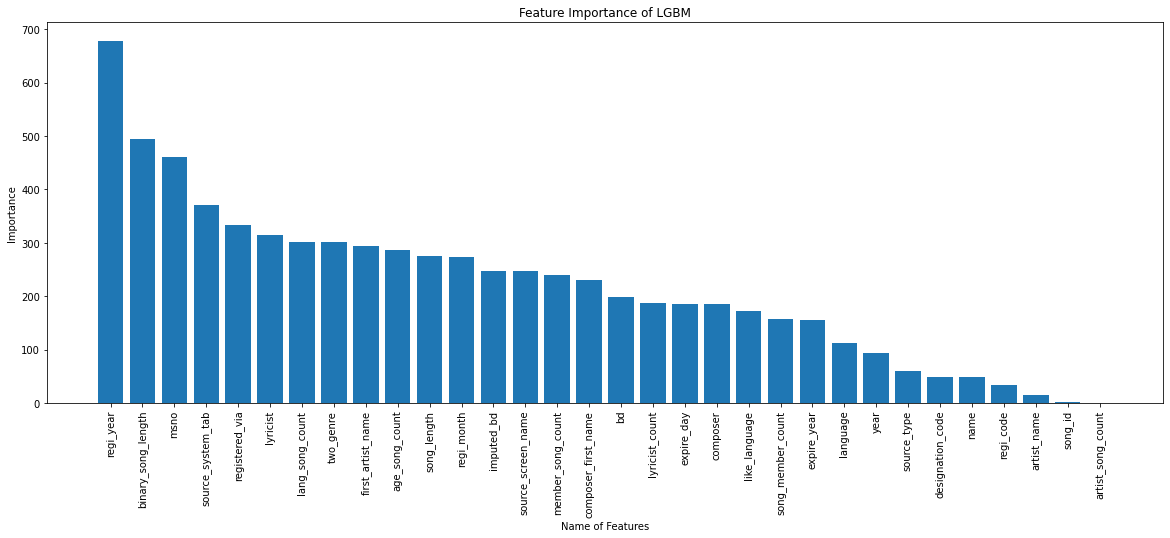

In [ ]:
feature_impotance_plot(clf , 'LGBM')

# **Stacking Classifier**
### **Decision Tree + Random_forest + XGBoost + LGBM**

In [ ]:
estimators = [ 
              ('dt' ,  DecisionTreeClassifier(  ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=92,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'  ) ) ,
              ( 'rf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) ),
              ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bynode=1, colsample_bytree=1, gamma=0.01,
                        learning_rate=0.1, max_delta_step=0, max_depth=13,
                        min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
                        nthread=None, objective='binary:logistic', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                        silent=None, subsample=1, verbosity=1)),
              ('lgbm', LGBMClassifier( boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        importance_type='split', learning_rate=0.1, max_depth=6,
                        min_child_samples=8, min_child_weight=0.001, min_split_gain=0.0,
                        n_estimators=500, n_jobs=-1, num_leaves=15, objective=None,
                        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                        subsample=1.0, subsample_for_bin=200000, subsample_freq=0 ) )
              
 ]

stacking = StackingClassifier(estimators ,verbose=1 )
stacking.fit(x_train,y_train)

In [ ]:
stacking = StackingClassifier(estimators ,verbose=1 )
stacking.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 17.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 44.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


StackingClassifier(cv=None,
                   estimators=[('dt',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=92,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=50,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                        

In [ ]:
start = time.time()
train_test_pred(stacking , x_train , x_val)

AUC Score of Train Data :  0.9839591302022944
AUC Score of Val_data   :  0.7263161792228515


In [ ]:
test_pred(stacking,test_data,'stacking_Prediction')

'Prediction on Test Data is saved.'

# **Create Features From PCA**

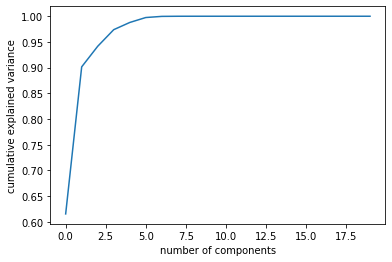

In [ ]:
pca =  PCA(n_components = 20)
pca.fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### **As we see within 6 features our most variance covers.**
#### **we know that within 6 components our most variance covers so take 10 components for 100% variance of our data.**

In [13]:
pca =  PCA(n_components = 10)
pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_val   = pca.transform(x_val)
pca_test  = pca.transform(test_data)


for i in range(10):
    x_train['pca_feature'+ str(i)]   = pca_train[:, i]
    x_val['pca_feature'+ str(i)]     = pca_val[:,i]
    test_data['pca_feature'+ str(i)] = pca_test[:,i]

In [15]:
print(x_train.shape)
print(x_val.shape)
print(test_data.shape)

(187500, 42)
(62500, 42)
(2556790, 42)


# **Random Forest**

In [ ]:
params = {
    'max_depth' : [ 3,5,8,10,13,15] , 
    'min_samples_split' : [ 3,50,100,150]}

clf = RandomForestClassifier(class_weight = 'balanced' , random_state=42)

model = RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 3)
model.fit(x_train, y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_val, y_val))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Train AUC  : 0.7959560976204214
Val AUC    : 0.7081201091175061


In [ ]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.7974401662794004
AUC Score of Val_data   :  0.7091436652307126


In [ ]:
test_pred(clf,test_data,'pca_random_forest.csv')

'Prediction on Test Data is saved.'

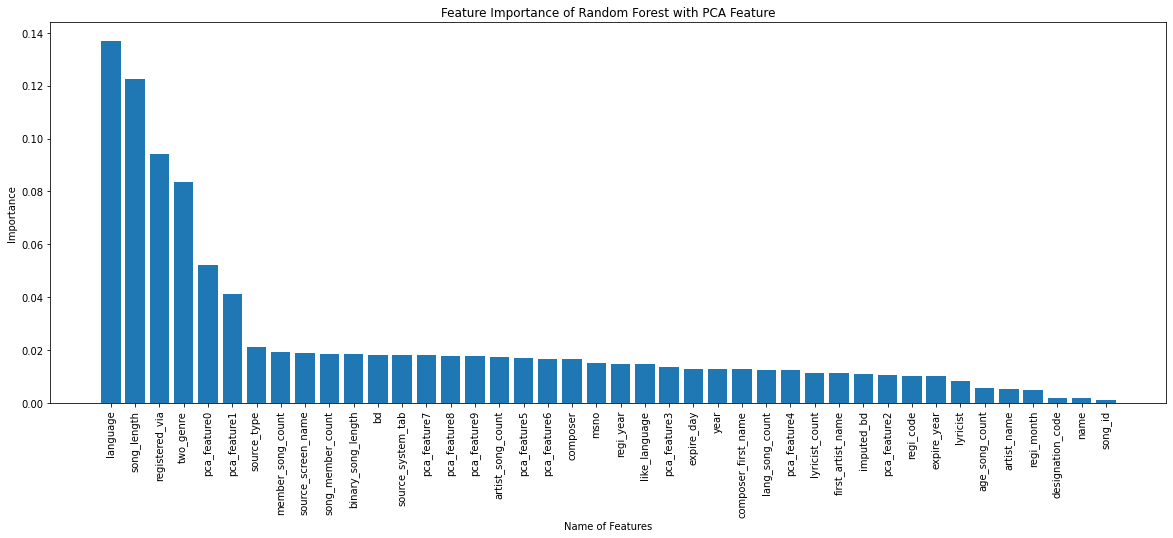

In [ ]:
feature_impotance_plot(clf , 'Random Forest with PCA Feature')

# **XGBoost**

In [ ]:
params = {
 'learning_rate':[0.01,0.05,0.1,0.3],
 'max_depth':[3,5,10,13,15,18],
 'colsample_bytree':[0.1,0.3,0.5,1],
 'subsample':[0.1,0.3,0.5,1],
 'gamma':[0.01,0.1,0.2,0.4]
}

clf = XGBClassifier()

model =  RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 3)
model.fit(x_train, y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_val , y_val))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)
Train AUC  : 0.9549849554841928
Val AUC    : 0.7074753334155434


In [ ]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)
clf.fit(x_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [ ]:
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.9549849554841928
AUC Score of Val_data   :  0.7074753334155434


In [ ]:
test_pred(clf,test_data,'pca_xgboost')

'Prediction on Test Data is saved.'

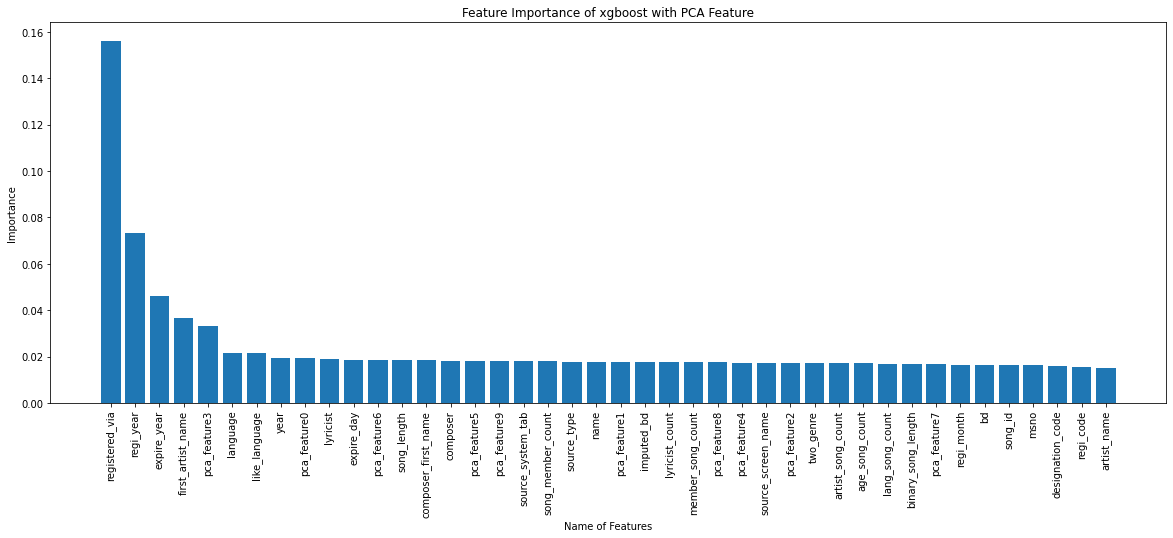

In [ ]:
feature_impotance_plot(clf , 'xgboost with PCA Feature')

# **LBGM Classifier**

In [ ]:
params = {'min_child_samples' : [5,8,10,15],
 'num_leaves' : [12,15,18,20],
 'max_depth' : [2,4,6,8,10],
 'n_estimators' : [100,200,300,500],
 'learning_rate' : [0.001,0.01,0.1,0.5]
 }

clf = LGBMClassifier()

model =  RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 3)
model.fit(x_train, y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_val , y_val))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=18, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Train AUC  : 0.7428429771780117
Val AUC    : 0.7113447920320441


In [16]:
clf = LGBMClassifier( boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators = 1000, n_jobs=-1, num_leaves=18, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
clf.fit( x_train, y_train )

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=18, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.769001233762147
AUC Score of Val_data   :  0.7124106032028676


In [18]:
test_pred(clf,test_data,'pca_LGBM')

'Prediction on Test Data is saved.'

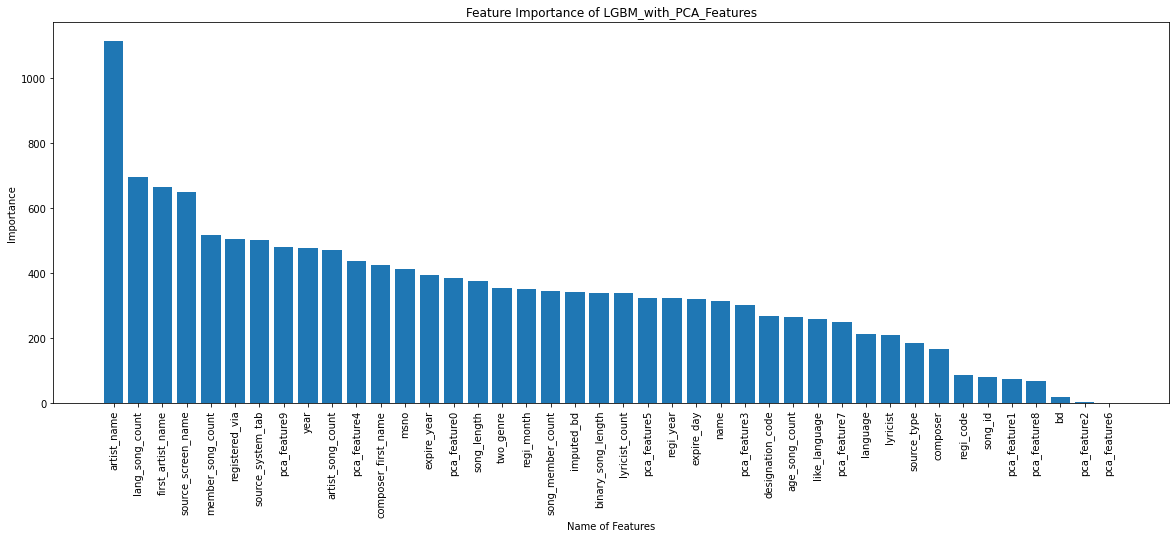

In [ ]:
feature_impotance_plot(clf , 'LGBM_with_PCA_Features')

# **Select k Features from SelectKBest**

In [20]:
selection = SelectKBest(f_classif, k=20).fit(x_train, y_train)
k_train = selection.transform(x_train)
k_val   = selection.transform(x_val)
k_test  = selection.transform(test_data)

In [21]:
k_train.shape , k_val.shape , k_test.shape

((187500, 20), (62500, 20), (2556790, 20))

## **LGBM**

In [ ]:
params = {'min_child_samples' : [5,8,10,15],
 'num_leaves' : [12,15,18,20],
 'max_depth' : [2,4,6,8,10],
 'n_estimators' : [100,200,300,500],
 'learning_rate' : [0.001,0.01,0.1,0.5]
 }

clf = LGBMClassifier()

model =  RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 3)
model.fit(k_train, y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(k_train , y_train))
print('Val AUC    :' , model.score(k_val , y_val))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=12, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Train AUC  : 0.7107737028711285
Val AUC    : 0.7070701679148832


In [22]:
clf = LGBMClassifier( boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1500, n_jobs=-1, num_leaves=12, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
clf.fit( k_train, y_train )

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1500, n_jobs=-1, num_leaves=12, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [23]:
train_test_pred(clf , k_train , k_val)

AUC Score of Train Data :  0.7619187034729957
AUC Score of Val_data   :  0.7132867474139292


In [24]:
test_pred(clf,k_test,'k_best_LGBM')

'Prediction on Test Data is saved.'

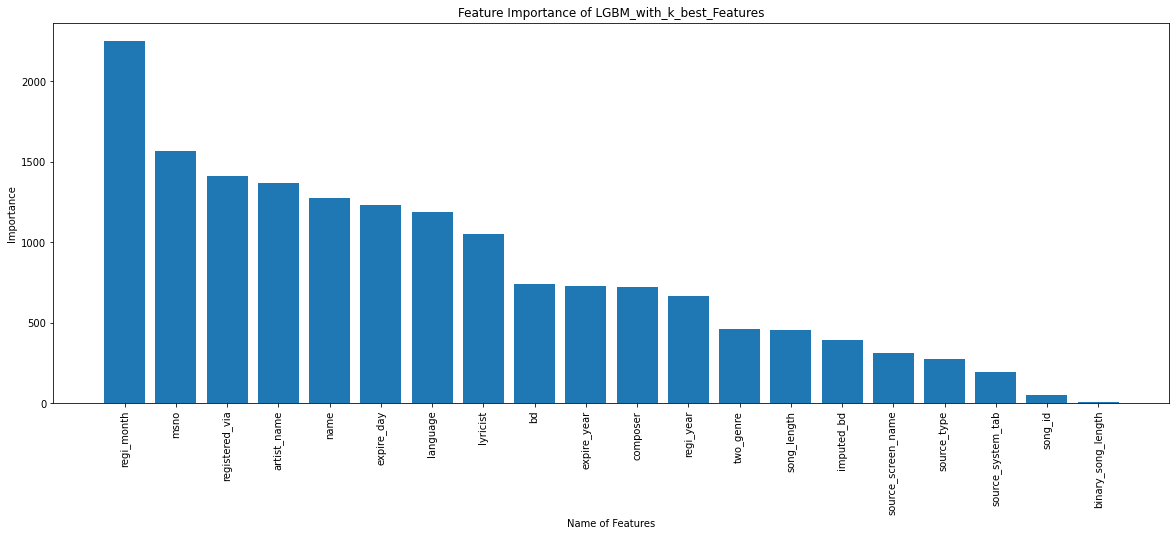

In [ ]:
feature_impotance_plot(clf , 'LGBM_with_k_best_Features')

## **Stacking**
### **Decision tree , Random Forest,XGBoost , LGBM**

In [ ]:
estimators = [ 
              ('dt' ,  DecisionTreeClassifier(  ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=92,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'  ) ) ,
              ( 'rf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) ),
              
              ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bynode=1, colsample_bytree=1, gamma=0.01,
                        learning_rate=0.1, max_delta_step=0, max_depth=13,
                        min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
                        nthread=None, objective='binary:logistic', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                        silent=None, subsample=1, verbosity=1)) ,
              ('lgbm', LGBMClassifier( boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        importance_type='split', learning_rate=0.1, max_depth=6,
                        min_child_samples=8, min_child_weight=0.001, min_split_gain=0.0,
                        n_estimators=1000, n_jobs=-1, num_leaves=15, objective=None,
                        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                        subsample=1.0, subsample_for_bin=200000, subsample_freq=0 ) )
              
 ]

In [ ]:
stacking = StackingClassifier(estimators ,verbose=1 )
stacking.fit(k_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 20.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 44.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


StackingClassifier(cv=None,
                   estimators=[('dt',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=92,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=50,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                        

In [ ]:
train_test_pred(stacking , k_train , k_val)

AUC Score of Train Data :  0.9530974394687759
AUC Score of Val_data   :  0.7224701000587619


In [ ]:
test_pred(stacking,k_test,'k_best_stacking')

'Prediction on Test Data is saved.'

# **Bin Counting(log-odds ratio)**
##### **Use conditional probability of particular category with target.**

##### **log_odds ratio =  log(p(y=1 | x=1)) - log(p(y=0 | x=1))**
##### **where y = particular category of feature and x is target variable.**

#### Reference take from book : Feature_Engineering_For_Machine_Learning 

In [ ]:
def bin_counting(col_name , x_train , x_val , test_data):
    
    bin_encoding = pd.DataFrame()
    x_train['target'] = y_train

    bin_encoding['target_1_count'] = x_train[col_name][x_train['target'] == 1].value_counts()
    bin_encoding['target_0_count'] = x_train[col_name][x_train['target'] == 0].value_counts()
    bin_encoding['Total_category_count'] = x_train[col_name].value_counts() 

    bin_encoding['target_1_count'] = bin_encoding['target_1_count'].fillna(0)
    bin_encoding['target_0_count'] = bin_encoding['target_0_count'].fillna(0)
    bin_encoding['Total_category_count'] = bin_encoding['Total_category_count'].fillna(0)

    bin_encoding['positive'] = bin_encoding['target_1_count'].div(bin_encoding['Total_category_count'])
    bin_encoding['negative'] = bin_encoding['target_0_count'].div(bin_encoding['Total_category_count'])
    bin_encoding['log']  = np.log(bin_encoding['positive']) - np.log(bin_encoding['negative'])

    d = dict([(key,values) for key,values in zip(bin_encoding.index, bin_encoding.log)])

    x_train['prob_'+col_name] = x_train[col_name].map(d)

    x_val['prob_'+col_name] = x_val[col_name].map(d)

    test_data['prob_'+col_name] = test_data[col_name].map(d)

In [ ]:
x_train.shape , x_val.shape , test_data.shape

((187500, 32), (62500, 32), (2556790, 32))

In [ ]:
encoding_feature = ['source_screen_name' , 'source_type' ]
for i in encoding_feature:
    bin_counting(i,x_train , x_val , test_data )
    #x_train = x_train.drop('target' ,axis = 1 )

source_screen_name  Done.
source_type  Done.


In [ ]:
x_train.shape , x_val.shape , test_data.shape

((187500, 34), (62500, 34), (2556790, 34))

# **LGBM**

In [ ]:
params = {'min_child_samples' : [5,8,10,15],
 'num_leaves' : [8,12,15,18],
 'max_depth' : [2,4,6,8,10],
 'learning_rate' : [0.001,0.01,0.1,0.5]
 }

clf = LGBMClassifier(n_estimators=500 , random_state=42)

model =  RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 3)
model.fit(x_train, y_train)

print(model.best_estimator_)

print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_val , y_val))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.5min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=5, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=8, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Train AUC  : 0.7264051950524487
Val AUC    : 0.710975430990195


In [ ]:
clf = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=10,
               min_child_samples=5, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=8, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
clf.fit( x_train, y_train )

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=10,
               min_child_samples=5, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=8, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# source screen , source_type
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.773969867092791
AUC Score of Val_data   :  0.7144373323972704


In [ ]:
test_pred(clf,test_data,'LGBM_prob')

'Prediction on Test Data is saved.'

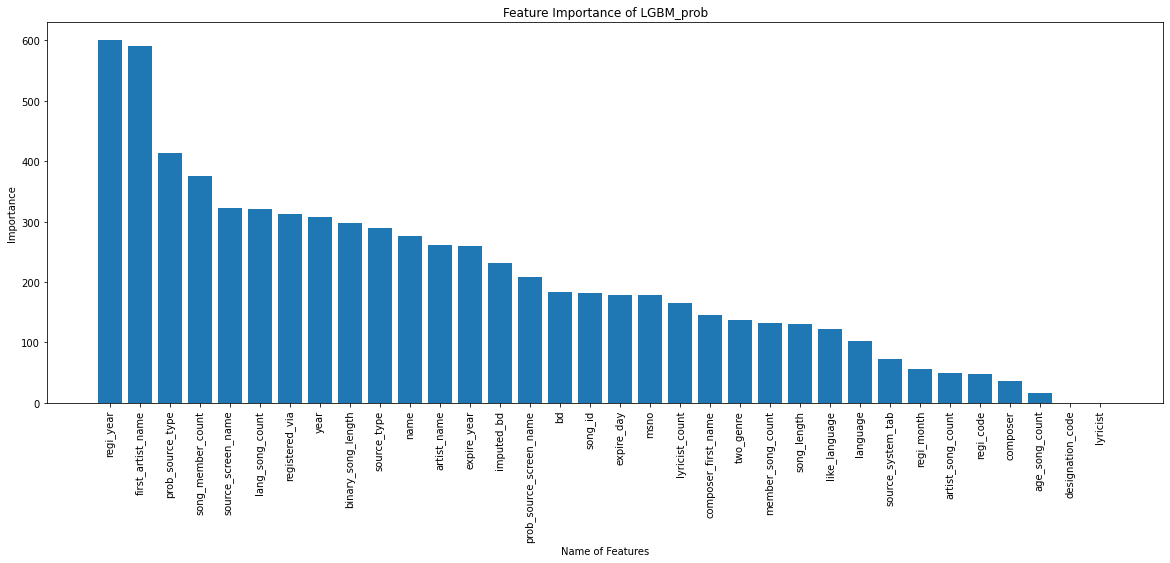

In [ ]:
feature_impotance_plot(clf , 'LGBM_prob')

# **AdaBoost**

In [ ]:
params = {'learning_rate' : [0.01,0.1,0.5,1]}

clf = AdaBoostClassifier()

model =  RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 3)
model.fit(x_train, y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_val , y_val))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.8min finished


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=50, random_state=None)
Train AUC  : 0.6982694054580443
Val AUC    : 0.6978653216372456


In [ ]:
start  = time.time()
clf = AdaBoostClassifier( algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                         n_estimators=1000, random_state=None )

clf.fit(x_train,y_train)
print((time.time() - start) / 60 )

5.672406001885732


In [ ]:
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.7048254918774453
AUC Score of Val_data   :  0.7018064188693149


In [ ]:
# Private Score : 
# Public Score  : 
test_pred(clf,test_data , 'Adaboost_prob')

'Prediction on Test Data is saved.'

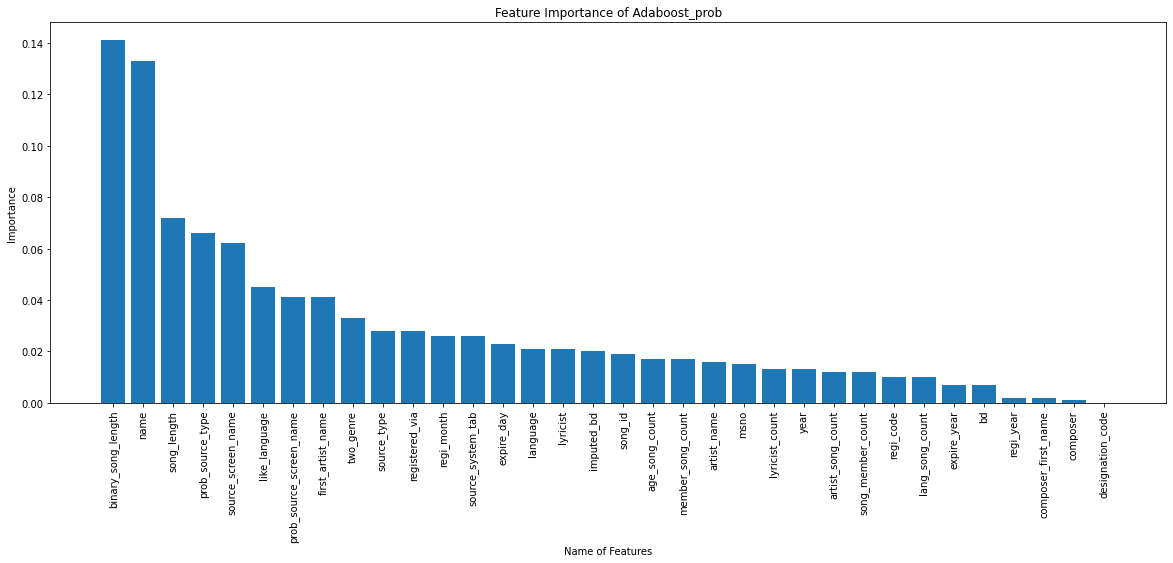

In [ ]:
feature_impotance_plot(clf , 'Adaboost_prob')

# **Random Forest**

In [ ]:
params = {
    'max_depth' : [ 3,5,8,10,13,15] , 
    'min_samples_split' : [ 3,50,100,200]}

clf = RandomForestClassifier(class_weight = 'balanced' , random_state=42)

model = RandomizedSearchCV(clf , params , scoring='roc_auc' , n_jobs=-1 , verbose=2 , cv = 3)
model.fit(x_train, y_train)

print(model.best_estimator_)
print('Train AUC  :' , model.score(x_train , y_train))
print('Val AUC    :' , model.score(x_val, y_val))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Train AUC  : 0.8554971332999617
Val AUC    : 0.7120280004610883


In [ ]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
train_test_pred(clf , x_train , x_val)

AUC Score of Train Data :  0.8584070079018968
AUC Score of Val_data   :  0.7133280823472363


In [ ]:
test_pred(clf,test_data,'random_forest_prob.csv')

'Prediction on Test Data is saved.'

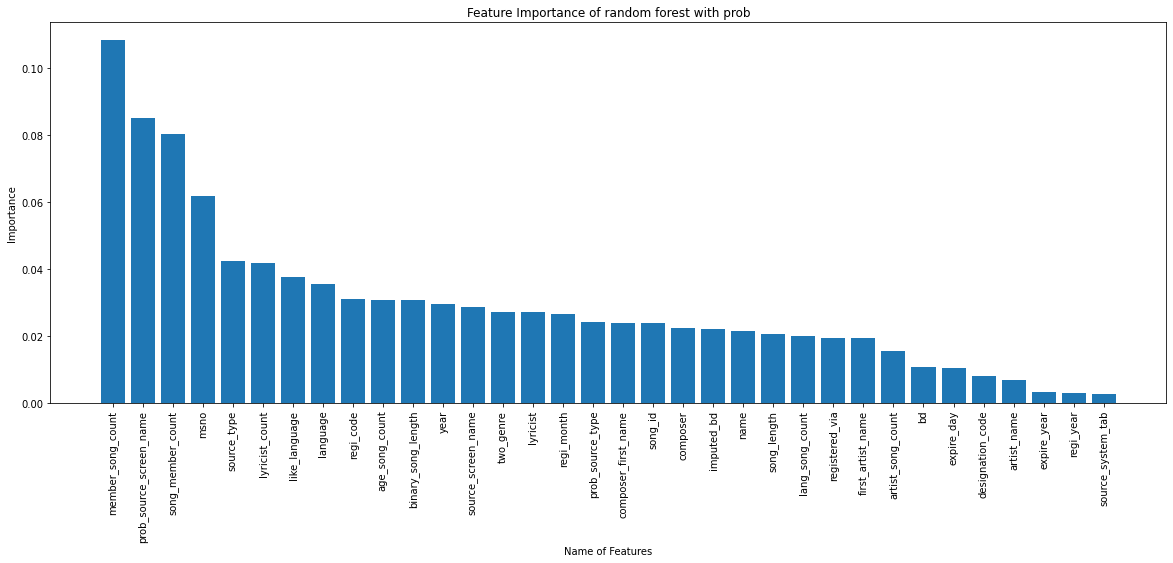

In [ ]:
feature_impotance_plot(clf , 'random forest with prob')

# **stacking**
### **Random Forest , Adaboost , LGBM**

In [ ]:
estimators = [
              ( 'rf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='gini', max_depth=15, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=3,
                        min_weight_fraction_leaf=0.0, n_estimators=1500,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) ),
              
              ('adaboost', AdaBoostClassifier( algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                        n_estimators=1000, random_state=None )),
              
              ('lgbm', LGBMClassifier( boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        importance_type='split', learning_rate=0.2, max_depth=10,
                        min_child_samples=5, min_child_weight=0.001, min_split_gain=0.0,
                        n_estimators=1500, n_jobs=-1, num_leaves=8, objective=None,
                        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                        subsample=1.0, subsample_for_bin=200000, subsample_freq=0 ) )
              
 ]

In [ ]:
x_train['prob_source_screen_name'] = x_train['prob_source_screen_name'].fillna(0)
x_val['prob_source_screen_name'] = x_val['prob_source_screen_name'].fillna(0)
test_data['prob_source_screen_name'] = test_data['prob_source_screen_name'].fillna(0)

In [ ]:
stacking = StackingClassifier(estimators ,verbose=1 )
stacking.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 42.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 23.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished


StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight='balanced',
                                                       criterion='gini',
                                                       max_depth=15,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=3,
                                 

In [ ]:
# with drop features
train_test_pred(stacking , x_train , x_val)

AUC Score of Train Data :  0.8370780568787233
AUC Score of Val_data   :  0.718274418715922


In [ ]:
test_pred(stacking ,test_data,'stacking_prob')

'Prediction on Test Data is saved.'

# **stacking**
### **Decision Tree , Random Forest , XGBoost , LGBM**

In [ ]:
estimators = [ 
              ('dt' ,  DecisionTreeClassifier(  ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=92,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'  ) ) ,
              ( 'rf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) ),
              ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bynode=1, colsample_bytree=1, gamma=0.01,
                        learning_rate=0.1, max_delta_step=0, max_depth=13,
                        min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
                        nthread=None, objective='binary:logistic', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                        silent=None, subsample=1, verbosity=1)),
              ('lgbm', LGBMClassifier( boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        importance_type='split', learning_rate=0.1, max_depth=10,
                        min_child_samples=8, min_child_weight=0.001, min_split_gain=0.0,
                        n_estimators=1000, n_jobs=-1, num_leaves=12, objective=None,
                        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                        subsample=1.0, subsample_for_bin=200000, subsample_freq=0 ) )
              
 ]

In [ ]:
x_train['prob_source_screen_name'] = x_train['prob_source_screen_name'].fillna(0)
x_val['prob_source_screen_name'] = x_val['prob_source_screen_name'].fillna(0)
test_data['prob_source_screen_name'] = test_data['prob_source_screen_name'].fillna(0)

In [ ]:
stacking = StackingClassifier(estimators ,verbose=1 )
stacking.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 25.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 77.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


StackingClassifier(cv=None,
                   estimators=[('dt',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=92,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=50,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                        

In [ ]:
# with drop features
train_test_pred(stacking , x_train , x_val)

AUC Score of Train Data :  0.9947340021031384
AUC Score of Val_data   :  0.7289496456579778


In [ ]:
test_pred(stacking ,test_data,'stacking_prob')

'Prediction on Test Data is saved.'

# **Average of LGBM and Stacking Bin counting**

In [ ]:
clf = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=10,
               min_child_samples=5, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=8, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
clf.fit( x_train, y_train )
pred1 = clf.predict_proba(test_data)[:,1]


estimators = [ 
              ('dt' ,  DecisionTreeClassifier(  ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=92,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'  ) ) ,
              ( 'rf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) ),
              ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bynode=1, colsample_bytree=1, gamma=0.01,
                        learning_rate=0.1, max_delta_step=0, max_depth=13,
                        min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
                        nthread=None, objective='binary:logistic', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                        silent=None, subsample=1, verbosity=1)),
              ('lgbm', LGBMClassifier( boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        importance_type='split', learning_rate=0.1, max_depth=10,
                        min_child_samples=8, min_child_weight=0.001, min_split_gain=0.0,
                        n_estimators=1000, n_jobs=-1, num_leaves=12, objective=None,
                        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                        subsample=1.0, subsample_for_bin=200000, subsample_freq=0 ) )
              
 ]

stacking = StackingClassifier(estimators ,verbose=1 )
stacking.fit(x_train,y_train)

stacking.fit( x_train, y_train )
pred2 = stacking.predict_proba(test_data)[:,1]

pred = (pred1 + pred2) / 2

submission['id'] = ids
submission['target'] = pred

submission.to_csv('average(stacking_prob_2+LGBM_with_prob',index = False)

# **Model Comparisons**

In [17]:
x = PrettyTable()
x.field_names = ["Sr. No.",'Model','Train_AUC','Val_AUC','Private_Score','Public_Score']

In [18]:
x.add_row(['1.','Decision Tree',0.70169,0.69691,0.64184,0.63551])
x.add_row(['2.','Random Forest',0.76991,0.71046,0.65198,0.64811  ])
x.add_row(['3.','AdaBoost',0.70042,0.69967,0.64931,0.64545])
x.add_row(['4.','XGBoost',0.99998,0.71989,0.64208,0.63868  ])
x.add_row(['5.','LGBM',0.74691,0.71296,0.65540,0.65209  ])
x.add_row(['6.','Stacking(DT+RF+XGB+LGBM)',0.98395,0.72631,0.65642,0.65284  ])
x.add_row(['7.','Random Forest with PCA' , 0.79744,0.70914,0.64979,0.64582])
x.add_row(['8.','XGBoost with PCA' ,0.95498,0.70747,0.64289,0.63976])
x.add_row(['9.','LGBM with PCA' , 0.76900,0.71241, 0.65274,0.64933 ])
x.add_row(['10.','LGBM with k-best' , 0.76191 , 0.71328 , 0.65112 ,0.64811 ])
x.add_row(['11.','Stacking(DT+RF+XGB+LGBM) with k-best' , 0.95309,0.72247,0.65112,0.64811 ])
x.add_row(['12.','LGBM with Bin counting' ,0.77396,0.71443,0.65439,0.65165 ])
x.add_row(['13.','Adaboost with Bin counting' , 0.70482,0.70180,'-','-'])
x.add_row(['15.','Stacking(DT+RF+XGB+LGBM) with Bin counting' ,0.99473,0.72894,0.65867,0.65356])
x.add_row(['14.','Stacking (Random Forest+Adaboost+LGBM)',0.83707,0.71827,'-','-'])
x.add_row(['16.','Average of LGBM + Stacking Bin counting','-','-',0.65799,0.65500])

In [19]:
print(x)

+---------+--------------------------------------------+-----------+---------+---------------+--------------+
| Sr. No. |                   Model                    | Train_AUC | Val_AUC | Private_Score | Public_Score |
+---------+--------------------------------------------+-----------+---------+---------------+--------------+
|    1.   |               Decision Tree                |  0.70169  | 0.69691 |    0.64184    |   0.63551    |
|    2.   |               Random Forest                |  0.76991  | 0.71046 |    0.65198    |   0.64811    |
|    3.   |                  AdaBoost                  |  0.70042  | 0.69967 |    0.64931    |   0.64545    |
|    4.   |                  XGBoost                   |  0.99998  | 0.71989 |    0.64208    |   0.63868    |
|    5.   |                    LGBM                    |  0.74691  | 0.71296 |     0.6554    |   0.65209    |
|    6.   |          Stacking(DT+RF+XGB+LGBM)          |  0.98395  | 0.72631 |    0.65642    |   0.65284    |
|    7.   

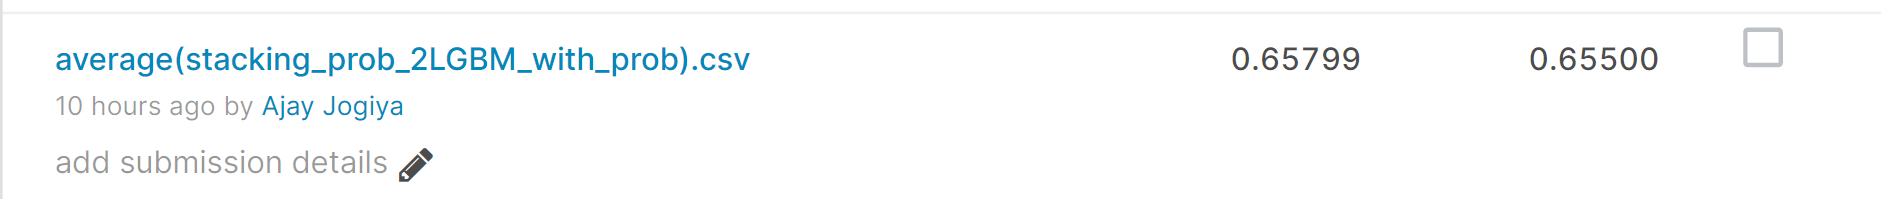